In [32]:
import math
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib.patches import Rectangle # type: ignore 
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
data = "Session_24_06_2024_HR13_MIN40_SEC59_added_cols.csv"
cls = ["TrackingStamp", "TimeStamp", "X", "Y", "Angle", "PosterNumber", "TrialStamp"]
df = pd.read_csv(data, skiprows=53, names=cls)

stamp, time, x, y, yaw = np.loadtxt("Session_25_06_2024_HR11_MIN57_SEC50.txt", skiprows=47, unpack = True)

# Create tuples with information of each poster 
posters = [
    (1, -12.27, -1.87, "Cat"), 
    (2, -2.77, 12.26, "Hippo"), 
    (3, 2.23, -1.87, "Fox"), 
    (4, 2.23, 7.63, "Rabbit"), 
    (5, -12.27, 17.13, "Crocodile"), 
    (6, -12.27, 7.63, "Pig")
    ]

x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

dfs = []
index = df.index[df['TrialStamp'] == 1].tolist() 
index = [0] + index + [len(df)]
for i in range(len(index) - 1):
    starting_index = index[i]
    ending_index = index[i+1]
    new_df = df.iloc[starting_index:ending_index]
    dfs.append(new_df)
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:\n{df}\n")
if dfs:
    dfs.pop(0)


DataFrame 1:
Empty DataFrame
Columns: [TrackingStamp, TimeStamp, X, Y, Angle, PosterNumber, TrialStamp]
Index: []

DataFrame 2:
     TrackingStamp  TimeStamp       X       Y    Angle  PosterNumber  \
0               11   0.020000  1.8623  7.1561  31.4827             1   
1                0   0.016787  1.8623  7.1561  31.4827             0   
2                0   0.016624  1.8623  7.1561  31.4827             0   
3                0   0.016474  1.8623  7.1561  31.4827             0   
4                0   0.016474  1.8623  7.1561  31.4827             0   
..             ...        ...     ...     ...      ...           ...   
647              0   0.016696 -7.0700 -4.8000   0.0000             0   
648              0   0.016696 -7.0700 -4.8000   0.0000             0   
649              0   0.016607 -7.0700 -4.8000   0.0000             0   
650              0   0.016696 -7.0700 -4.8000   0.0000             0   
651              0   0.016599 -7.0700 -4.8000   0.0000             0   

     Tr

In [24]:
n_plots = len(dfs)
n_cols = 6
n_rows = math.ceil(n_plots/n_cols)
poster_animal = ""
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 8))
axes = axes.flatten()

for i, (df, ax) in enumerate(zip(dfs, axes)):
    poster_number = df.loc[df['TrialStamp'] == 1, 'PosterNumber'].values[0] if not df.loc[df['TrialStamp'] == 1, 'PosterNumber'].empty else 'Unknown'
    if (poster_number == 1):
        poster_animal = "Cat"
    elif (poster_number == 2):
        poster_animal = "Hippo"
    elif (poster_number == 3):
        poster_animal = "Fox"
    elif (poster_number == 4):
        poster_animal = "Rabbit"
    elif (poster_number == 5):
        poster_animal = "Crocodile"
    elif (poster_number == 6):
        poster_animal = "Pig"
        
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.scatter(df[sorted("X")], df[sorted("Y")], marker = '.')
    ax.set_title(f'Trial {i + 1} (Poster {poster_animal})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    # ax.plot([-5.9350, 4.0231], [15.0350, 15.0350], color='black')
    # ax.plot([-5.9350, -5.9350], [18.8350, 15.0350], color='black')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()
# One thing to be noted is that the sim spawns you in the wall and teleports you out the second you move
# Which shows the slight height increase from approx -5, to a few points above it. 
# I have no idea how Trial 1 happened 

In [25]:
dfs1 = []
dfs2 = []
dfs3 = []
dfs4 = []
dfs5 = []
dfs6 = []
for df in dfs:
    select_poster_number = df.loc[df['TrialStamp'] == 1, 'PosterNumber'].values[0] if not df.loc[df['TrialStamp'] == 1, 'PosterNumber'].empty else 'Unknown'
    if (select_poster_number == 1):
        dfs1.append(df)
    elif (select_poster_number == 2):
        dfs2.append(df)
    elif (select_poster_number == 3):
        dfs3.append(df)
    elif (select_poster_number == 4):
        dfs4.append(df)
    elif (select_poster_number == 5):
        dfs5.append(df)
    elif (select_poster_number == 6):
        dfs6.append(df)
dfs_lists = [dfs1, dfs2, dfs3, dfs4, dfs5, dfs6]

This script combines all of the graphs above into one per type of poster. Each trial is represented by a different color, and the red x represents the location of the poster. 

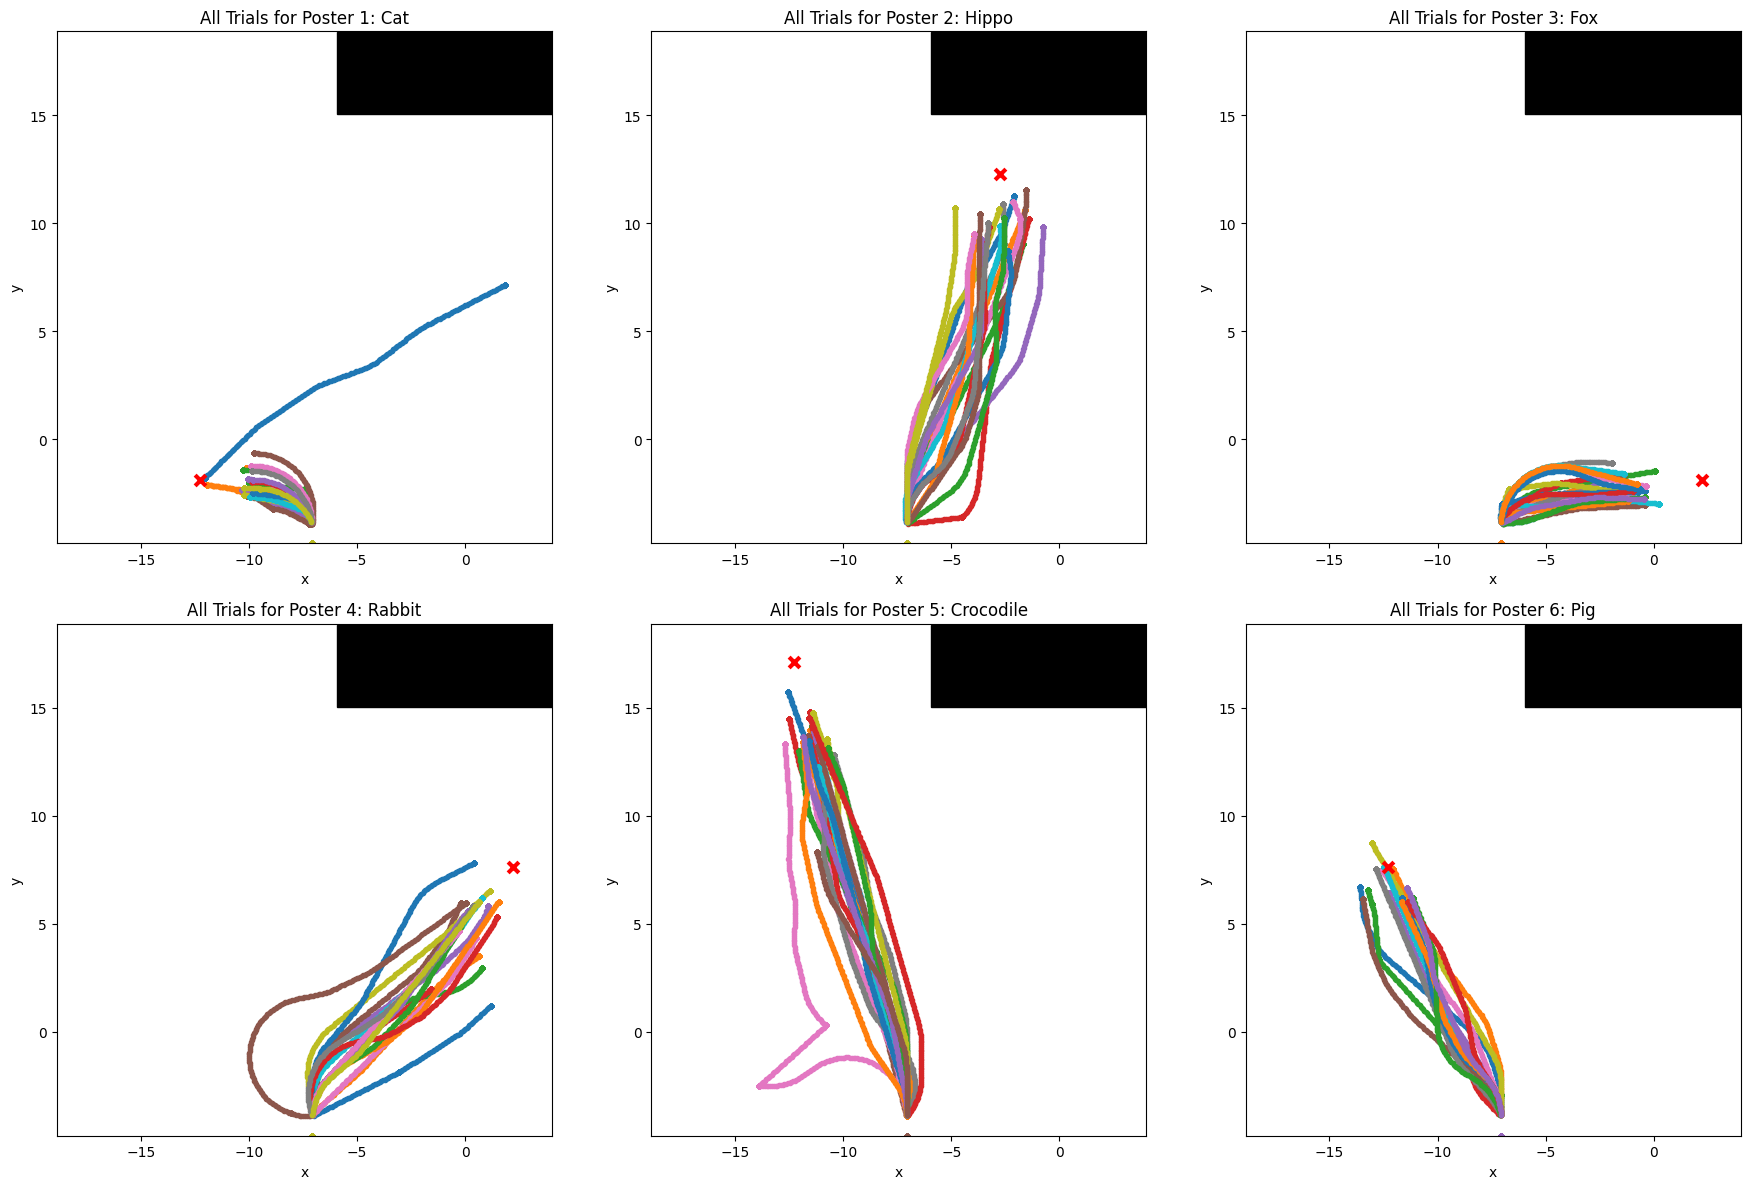

In [26]:
def plot_all(ax, dfs, tuple):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]

    for i, df in enumerate(dfs):
        ax.scatter(df['X'], df['Y'], marker = '.', label = f'Trial {i + 1}')
   
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster in zip(axes, dfs_lists, posters):
    plot_all(ax, dfs_list, poster)

plt.tight_layout()
plt.show()
#add green or red dot for correct 

Grabs the x and y values of all the final values for each trial, placed into their own sets organized by poster. 

In [27]:
x_values_sets = []
y_values_sets = []

for dfs_set in dfs_lists:
    x_values = []
    y_values = []
    
    for df in dfs_set: 
        filtered_df = df.loc[df['TrialStamp'] == 3]

        if not filtered_df.empty: 
            x_values.extend(filtered_df['X'].tolist())
            y_values.extend(filtered_df['Y'].tolist())

    x_values_sets.append(x_values)
    y_values_sets.append(y_values)

Function to calculate the all types of error? from each end point of each trial to the location of the poster. 

In [28]:
euclidean_distances = []
# add x and y data separately (add variance stats of each axis)
def euclidean_distance_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    errors = []
    
    for x, y in zip(x_values, y_values):
        euclidean_error = math.sqrt((target_x - x) ** 2 + (target_y - y) ** 2)
        errors.append(euclidean_error)
    euclidean_distance = sum(errors) / len(errors)
    return euclidean_distance

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    distance = round(euclidean_distance_error(x_values, y_values, poster),5)
    euclidean_distances.append(distance)

for i, distance in enumerate(euclidean_distances):
    print(f"Euclidean distance for {posters[i][3]}: {distance}")

Euclidean distance for Cat: 2.27766
Euclidean distance for Hippo: 2.22573
Euclidean distance for Fox: 3.23464
Euclidean distance for Rabbit: 3.03523
Euclidean distance for Crocodile: 3.65607
Euclidean distance for Pig: 1.0312


In [29]:
mean_absolute_errors = []

def mean_absolute_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    abs_errors = []
    
    for x, y in zip(x_values, y_values):
        absolute_error = abs(target_x - x) + abs(target_y - y)
        abs_errors.append(absolute_error)
    mean_absolute_error = sum(abs_errors) / len(abs_errors)
    return mean_absolute_error

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    absolute = round(mean_absolute_error(x_values, y_values, poster),5)
    mean_absolute_errors.append(absolute) 
    
for i, absolute in enumerate(mean_absolute_errors):
    print(f"Mean Absolute Error for {posters[i][3]}: {absolute}")

Mean Absolute Error for Cat: 2.67569
Mean Absolute Error for Hippo: 2.61451
Mean Absolute Error for Fox: 3.71034
Mean Absolute Error for Rabbit: 4.16511
Mean Absolute Error for Crocodile: 4.35506
Mean Absolute Error for Pig: 1.33269


In [30]:
root_mean_square_errors = []

def root_mean_square_error(x_values, y_values, tuple):
    target_x, target_y = tuple[1], tuple[2]
    rmse_errors = []
    
    for x, y in zip(x_values, y_values):
        root_mean_square_error = (target_x - x) ** 2 + (target_y - y) ** 2
        rmse_errors.append(root_mean_square_error)
    rmse_error = math.sqrt(sum(rmse_errors) / len(rmse_errors))
    return rmse_error

for x_values, y_values, poster in zip(x_values_sets, y_values_sets, posters):
    rmse_error = round(root_mean_square_error(x_values, y_values, poster),5)
    root_mean_square_errors.append(rmse_error) 
    
for i, rmse_error in enumerate(root_mean_square_errors):
    print(f"Root Mean Square Error for {posters[i][3]}: {rmse_error}")

Mean Absolute Error for Cat: 2.3527
Mean Absolute Error for Hippo: 2.34722
Mean Absolute Error for Fox: 3.28868
Mean Absolute Error for Rabbit: 3.30803
Mean Absolute Error for Crocodile: 3.71012
Mean Absolute Error for Pig: 1.21281


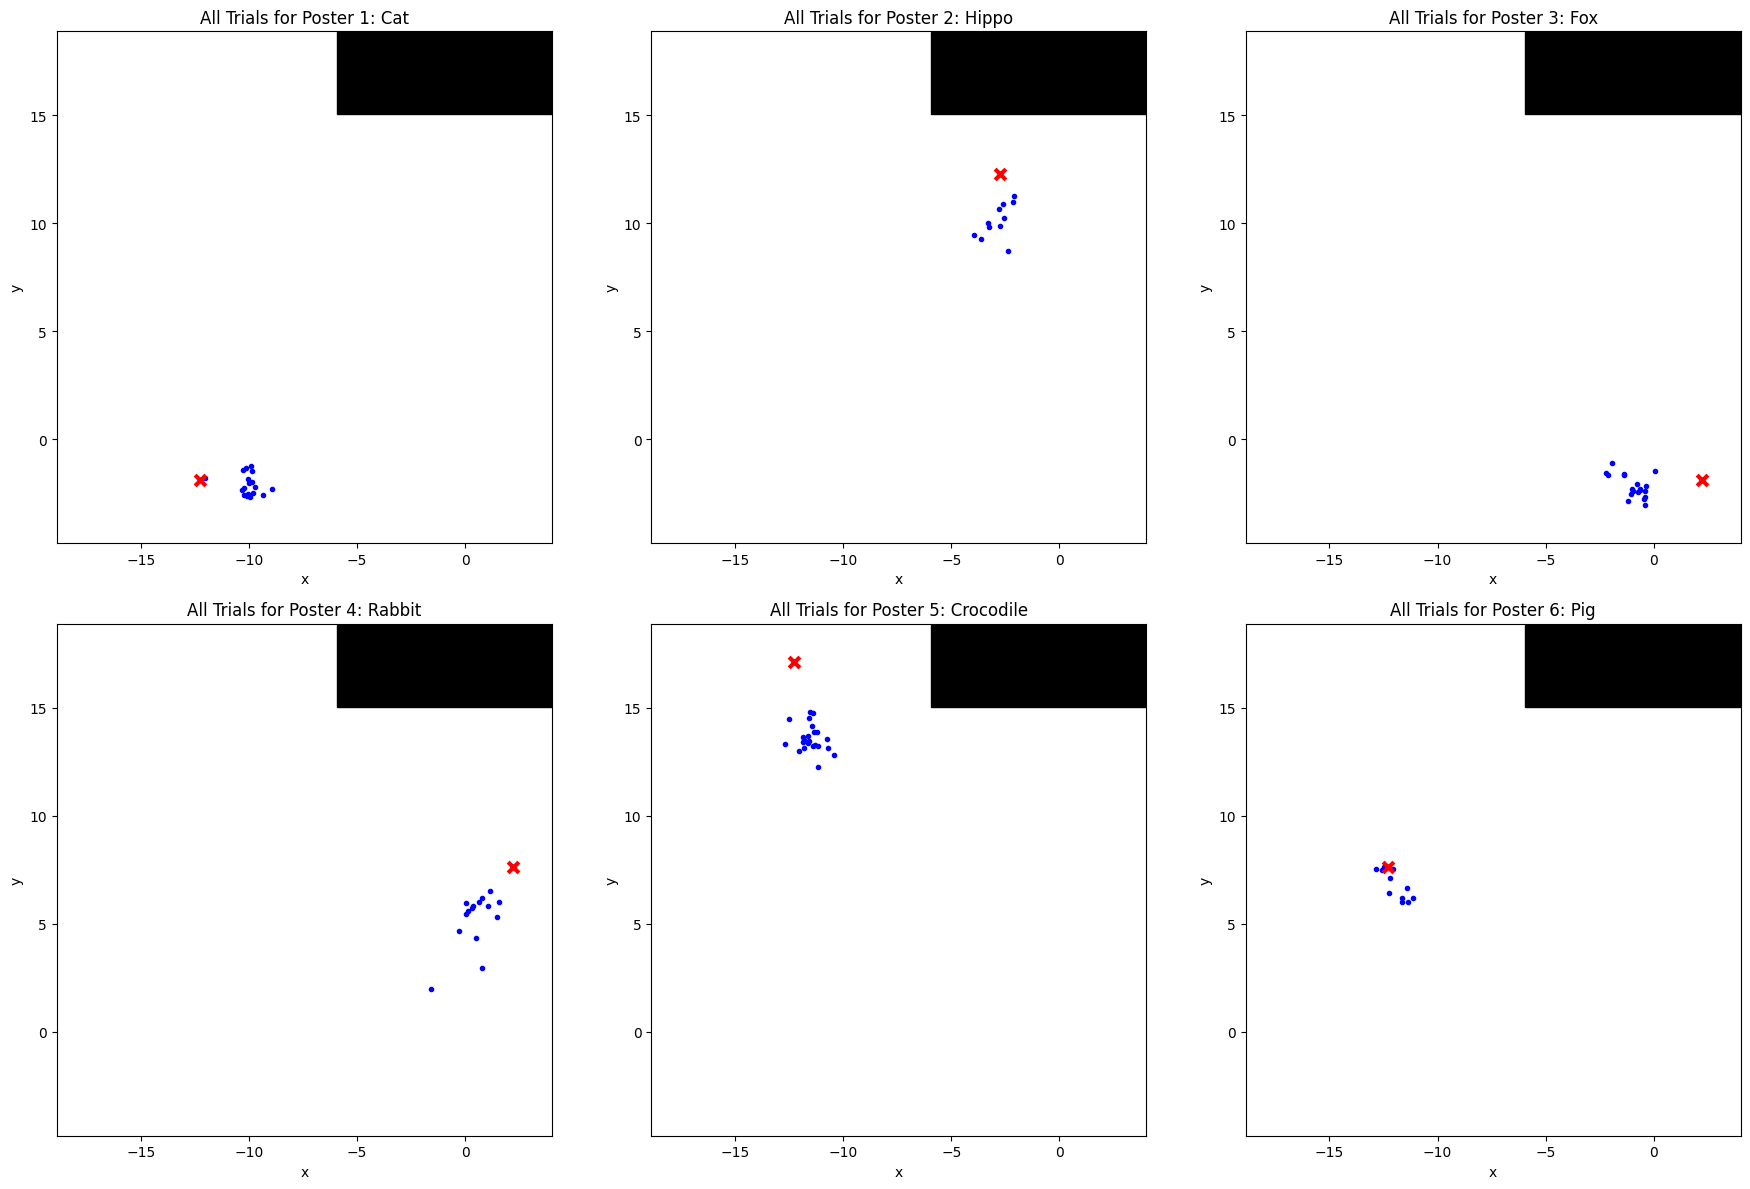

In [35]:
def plot_all(ax, dfs, tuple, x_values, y_values):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for x, y in zip(x_values, y_values):
        ax.scatter(x, y, marker = '.', color='blue')

    #create the rectangle in the back right of the environment:
    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    #ax.plot([-5.9350, 4.0231], [15.0350, 15.0350], color='black')
    #ax.plot([-5.9350, -5.9350], [18.8350, 15.0350], color='black')
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values)

plt.tight_layout()
plt.show()
# Make more data but without resetting position 

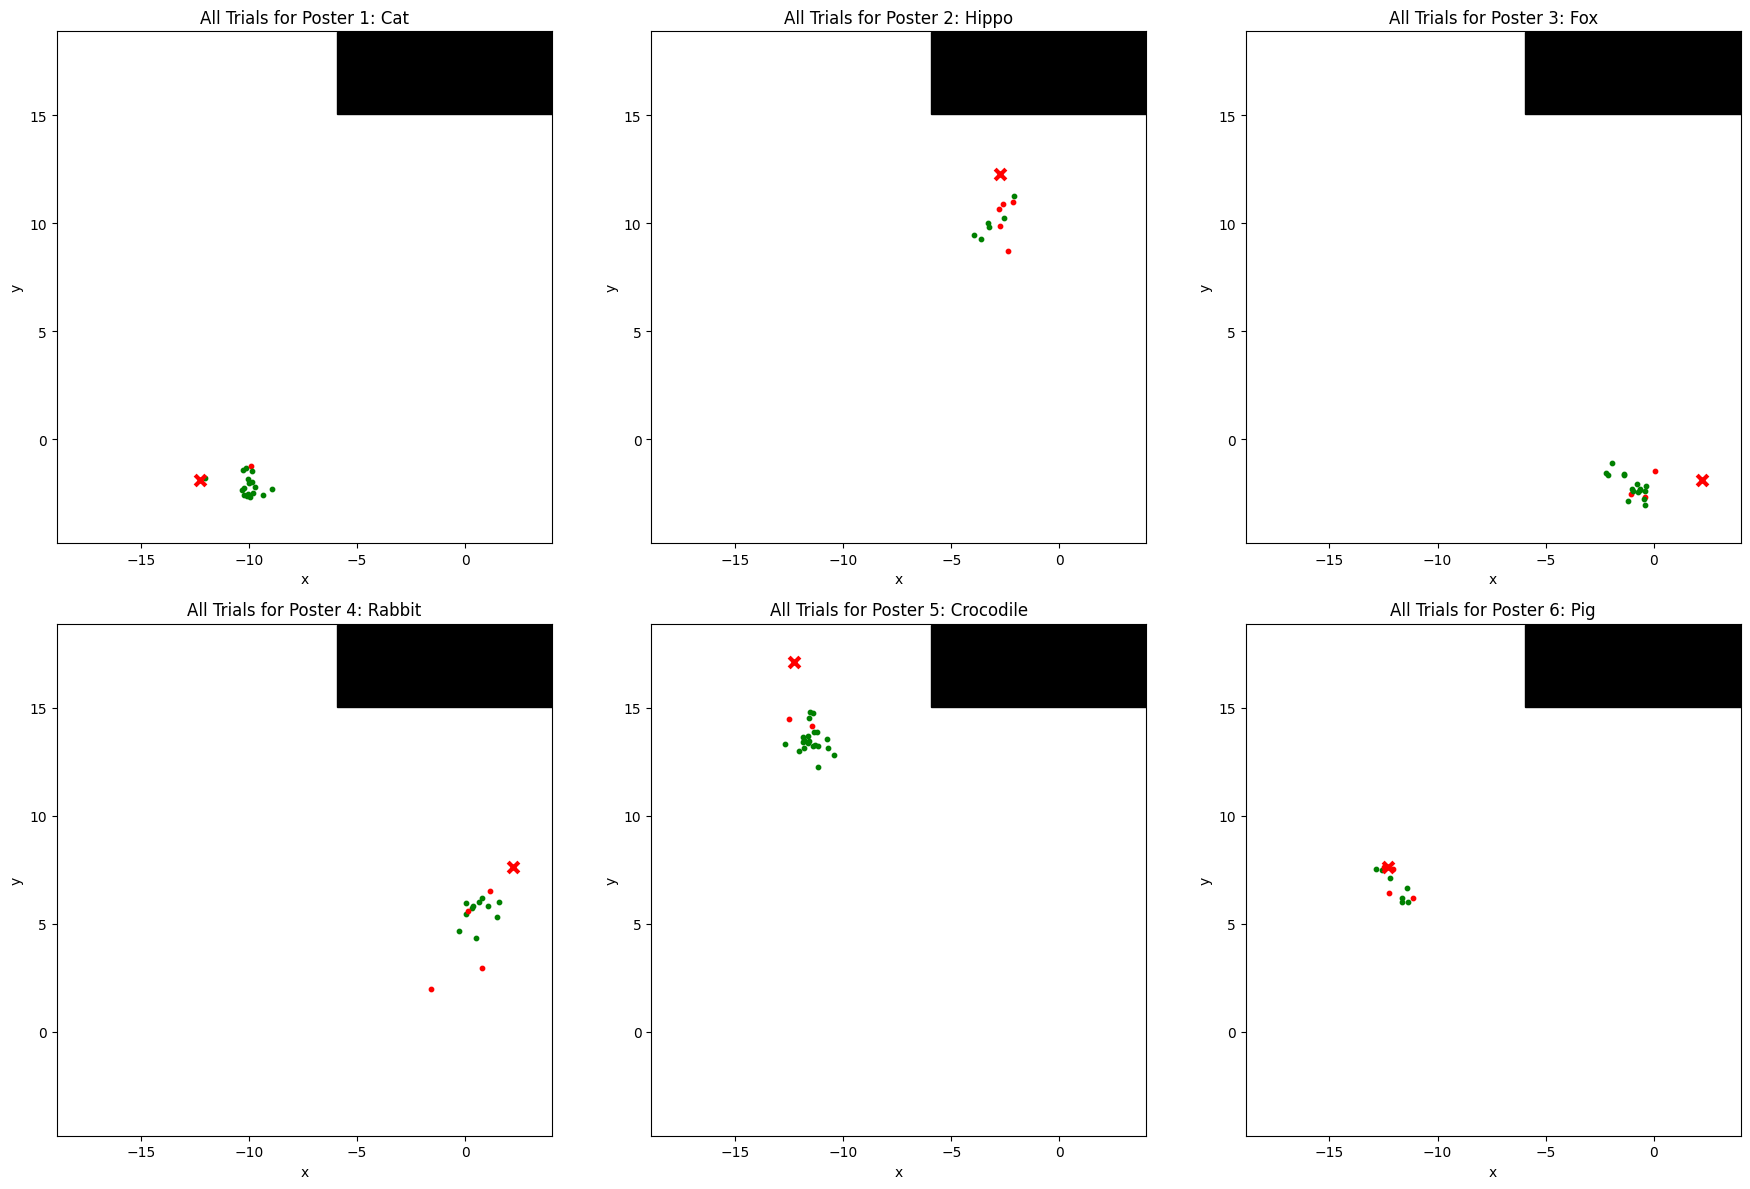

In [50]:
def plot_all(ax, dfs, tuple, x_values, y_values):

    poster_num, target_x, target_y, animal = tuple[0], tuple[1], tuple[2], tuple[3]
    
    for df, x, y in zip(dfs, x_values, y_values):
        if 4 in df['TrialStamp'].values:
            ax.scatter(x, y, marker='.', color='red', s=40)
        else:
            ax.scatter(x, y, marker='.', color='green', s=40)

    ax.add_patch(Rectangle((-5.9350, 15.0350), 9.9581, 3.8, color='black', fill=True))
    
    ax.scatter(target_x, target_y, color='red', marker = 'x', s=60, linewidths=3)

    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.set_title(f'All Trials for Poster {poster_num}: {animal}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

fig, axes = plt.subplots(2,3,figsize=(18, 12))
axes = axes.flatten()

for ax, dfs_list, poster, x_values, y_values in zip(axes, dfs_lists, posters, x_values_sets, y_values_sets):
    plot_all(ax, dfs_list, poster, x_values, y_values)

plt.tight_layout()
plt.show()